In [5]:

from Algorithm.img_preprocess import total_function, cvt_binary
import os
import cv2
from utility import preprocess, roi_cutting


In [6]:
img_path = "/hdd/woonho/autonomous_driving/rfdata/0111/"

img_idx = 245

img_list = os.listdir(img_path)

print(img_list[img_idx])
image = cv2.imread(os.path.join(img_path, img_list[img_idx]))
transform_img = total_function(image)
preprocess_img = preprocess(image, mode = "test")

f_bird--a7s20--1673445386.0646024--bcc30365-91b7-11ed-8ebe-f950612c03d0.png


In [7]:
from Networks.model import ResNet18

weight_file = "model_weight_file/best_steering_model_0115a.pth"

model = ResNet18(weight_file=weight_file)

print(model.run(preprocess_img))

tensor([[ 1.0346e-03, -1.0884e-01, -4.5122e-02, -1.0759e-01, -6.7801e-02,
         -7.8145e-02, -9.7328e-02, -9.1413e-02, -8.0631e-02, -9.0096e-02,
         -1.9175e-01, -1.0150e-01, -4.2075e-01, -6.4632e-02,  2.4957e+00]],
       device='cuda:0', grad_fn=<AddmmBackward>)


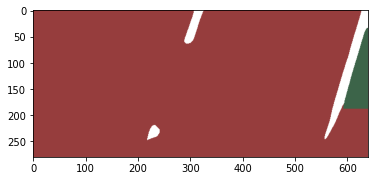

In [8]:
import matplotlib.pyplot as plt
roi_img = roi_cutting(transform_img)
plt.imshow(roi_img, cmap='gray')
plt.show()


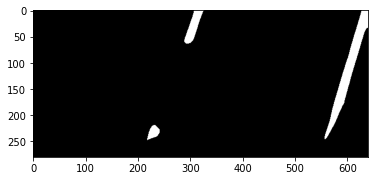

In [9]:
binary_img = cvt_binary(image)
roi_binary = roi_cutting(binary_img)
plt.imshow(roi_binary, cmap='gray')
plt.show()